In [1]:
import zipfile

# Download zipfile of pizza steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-15 21:49:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 172.253.123.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.6s    

2023-10-15 21:49:41 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}")

There are 2 directories and 0 images in 'pizza_steak
There are 2 directories and 0 images in 'pizza_steak/train
There are 0 directories and 750 images in 'pizza_steak/train/pizza
There are 0 directories and 750 images in 'pizza_steak/train/steak
There are 2 directories and 0 images in 'pizza_steak/test
There are 0 directories and 250 images in 'pizza_steak/test/pizza
There are 0 directories and 250 images in 'pizza_steak/test/steak


In [3]:
# Another way to findd out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # Turn our training path into a python part
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [5]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we will view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot in using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image Shape: {img.shape}") # Show the shape of the image

    return img

Image Shape: (512, 512, 3)


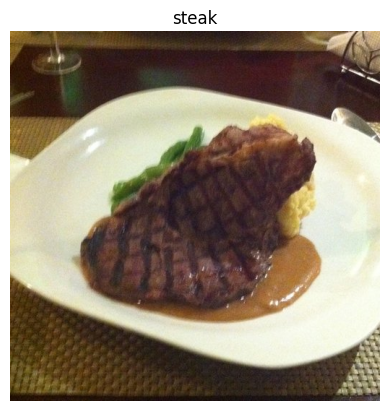

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

After going through a dozen or so images from the different classes, you can start to get an idea of what we are working with.

Te entire Food101 dataset comprises of similar images from 101 different classes.

You might have been printing the image shape alongside the plotted image.

This is because the way our computer sees the image is in the form of a big array (tensor).

In [7]:
# View the img (actually just a big array/tensor)
img

array([[[166, 129,  51],
        [151, 114,  36],
        [146, 110,  32],
        ...,
        [214, 183, 136],
        [208, 177, 133],
        [210, 179, 135]],

       [[160, 123,  45],
        [161, 124,  46],
        [161, 125,  47],
        ...,
        [211, 180, 133],
        [211, 180, 134],
        [214, 183, 139]],

       [[165, 128,  50],
        [167, 130,  52],
        [169, 132,  54],
        ...,
        [226, 195, 148],
        [214, 183, 137],
        [204, 173, 127]],

       ...,

       [[ 41,  23,  11],
        [ 34,  16,   4],
        [ 29,  13,   0],
        ...,
        [ 80,  73,  80],
        [ 95,  88,  95],
        [105,  98, 105]],

       [[ 36,  20,   7],
        [ 37,  21,   8],
        [ 36,  20,   7],
        ...,
        [ 87,  82,  89],
        [100,  95, 102],
        [108, 103, 110]],

       [[ 28,  12,   0],
        [ 38,  22,   9],
        [ 42,  26,  13],
        ...,
        [ 88,  83,  90],
        [ 99,  93, 103],
        [ 98,  92, 102]]

In [8]:
# View the image shape
img.shape # returns (width, height, colour channels)

(512, 512, 3)

Looking at the image shape more closely, you'll see it's in the for (Width, Height, Colour Channels).

In our case, the width and height vary but because we are dealing with colour images, the colour channels value is always 3. This is for different values of red,green and blue (RGB) pixels.

You will notice all of the values in the img array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value red=0, green=0, blue=255 will look very blue.

So when we build a model to differentiate between our images of pizza and steak, it will be finding patterns in these different pixel values which determine what each class looks like.

In [9]:
# Get all pixel values between 0 and 1
img/255

array([[[0.65098039, 0.50588235, 0.2       ],
        [0.59215686, 0.44705882, 0.14117647],
        [0.57254902, 0.43137255, 0.1254902 ],
        ...,
        [0.83921569, 0.71764706, 0.53333333],
        [0.81568627, 0.69411765, 0.52156863],
        [0.82352941, 0.70196078, 0.52941176]],

       [[0.62745098, 0.48235294, 0.17647059],
        [0.63137255, 0.48627451, 0.18039216],
        [0.63137255, 0.49019608, 0.18431373],
        ...,
        [0.82745098, 0.70588235, 0.52156863],
        [0.82745098, 0.70588235, 0.5254902 ],
        [0.83921569, 0.71764706, 0.54509804]],

       [[0.64705882, 0.50196078, 0.19607843],
        [0.65490196, 0.50980392, 0.20392157],
        [0.6627451 , 0.51764706, 0.21176471],
        ...,
        [0.88627451, 0.76470588, 0.58039216],
        [0.83921569, 0.71764706, 0.5372549 ],
        [0.8       , 0.67843137, 0.49803922]],

       ...,

       [[0.16078431, 0.09019608, 0.04313725],
        [0.13333333, 0.0627451 , 0.01568627],
        [0.11372549, 0